In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, metrics, linear_model, pipeline, ensemble
import numpy as np

import seaborn as sns

import scipy

np.set_printoptions(suppress=True, precision=4)

%matplotlib inline

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 10, 6

predict the price of the house (SalesPrice) https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Take log transformation on SalesPrice.

In [2]:

df = pd.read_csv(r"C:\Users\Gaurav\Downloads\data-master\data-master\kaggle-houseprice\data_combined_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [3]:
df_train = df[~np.isnan(df.SalesPrice)]
df_test = df[np.isnan(df.SalesPrice)]

In [4]:
df_train.shape, df_test.shape

((1460, 80), (1459, 80))

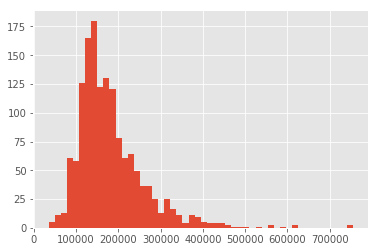

In [5]:
plt.hist(df_train.SalesPrice, bins = 50);

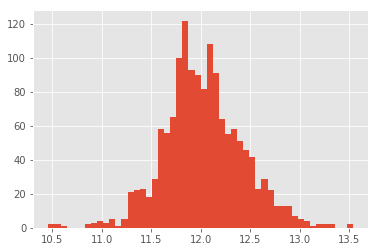

In [6]:
plt.hist(np.log(df_train.SalesPrice), bins = 50);

In [7]:
y = np.log(df.SalesPrice)
ids = df.Id
X = df.copy()
del X["Id"]
del X["SalesPrice"]
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


In [8]:
X_dummy = pd.get_dummies(X, drop_first= True)
X_train = X_dummy[~np.isnan(y)]
X_test = X_dummy[np.isnan(y)]
y_train = y[~np.isnan(y)]
    
pd.DataFrame(X_train).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.176370,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.433457,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
%%time 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("fit", linear_model.Lasso())
])
param_grid = {
    "fit__alpha": 10 ** np.linspace(-3, 1, 20)
}
gs = model_selection.GridSearchCV(cv=5, estimator=pipe, verbose = True,
                scoring="neg_mean_squared_error", param_grid=param_grid)

gs.fit(X_train, y_train)
print("best params", gs.best_params_, "best scores", - gs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best params {'fit__alpha': 0.004281332398719396} best scores 0.02165014370717071
Wall time: 9.93 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.7s finished


In [10]:
%%time 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("fit", linear_model.Ridge(random_state = 1))
])
param_grid = {
    "fit__alpha": 10 ** np.linspace(-3, 2, 20)
}
gs = model_selection.GridSearchCV(cv=5, estimator=pipe, verbose = True,
                scoring="neg_mean_squared_error", param_grid=param_grid)

gs.fit(X_train, y_train)
print("best params", gs.best_params_, "best scores", - gs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best params {'fit__alpha': 100.0} best scores 0.0223362035464504
Wall time: 5.35 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished


In [11]:
%%time 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("fit", linear_model.SGDRegressor(random_state=1, max_iter = 10000, tol=1e-6))
])
param_grid = {
    "fit__alpha": 10 ** np.linspace(0, 2, 5),
    "fit__loss": ["squared_loss", "huber"],
    "fit__l1_ratio": np.linspace(0.1, 0.9, 5)
}
gs = model_selection.GridSearchCV(cv=5, estimator=pipe, verbose = True,
                scoring="neg_mean_squared_error", param_grid=param_grid)

gs.fit(X_train, y_train)
print("best params", gs.best_params_, "best scores", - gs.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.9s finished


best params {'fit__alpha': 1.0, 'fit__l1_ratio': 0.1, 'fit__loss': 'huber'} best scores 0.02569279961132485
Wall time: 32.2 s


In [12]:
%%time 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("fit", ensemble.GradientBoostingRegressor(random_state=1, learning_rate=0.1, ))
])

param_grid = {
    "fit__learning_rate": [0.1, 0.01],
    "fit__alpha": np.linspace(0.001, 0.999, 5),
}
gs = model_selection.GridSearchCV(cv=5, estimator=pipe, verbose = True,
                scoring="neg_mean_squared_error", param_grid=param_grid)

gs.fit(X_train, y_train)
print("best params", gs.best_params_, "best scores", - gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.0s finished


best params {'fit__alpha': 0.001, 'fit__learning_rate': 0.1} best scores 0.017065447917036933
Wall time: 55.3 s


In [13]:
y_test_pred=gs.predict(X_test)
y_test_pred.shape
y_test_pred= np.e**y_test_pred
y_test_pred

array([121287.5044, 151607.7364, 182802.2874, ..., 159637.8966,
       118026.3482, 234258.6914])

In [14]:
ans=pd.DataFrame({"Id":ids[1460:], "SalePrice":y_test_pred})

In [15]:
ans.head()

,Id,SalePrice
1460,1461,121287.504387
1461,1462,151607.736371
1462,1463,182802.287385
1463,1464,186426.550853
1464,1465,191218.896801


In [16]:
ans.to_csv("result.csv",index=False)